In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv('lab_results_1.csv')

In [3]:
# Check and handle missing values
print(df[['n', 's', 'time_taken_ms', 'n_compares']].isna().sum())
df_cleaned = df.dropna(subset=['n', 's', 'time_taken_ms', 'n_compares'])

# Verify unique combinations
unique_combinations = df_cleaned[['n', 's']].drop_duplicates().sort_values(by=['n', 's']).reset_index(drop=True)
print(unique_combinations)

# Group by 'n' and 's' and calculate mean
mean_df = df_cleaned.groupby(['n', 's'])[['time_taken_ms', 'n_compares']].mean().reset_index()
mean_df.columns = ['Input Size (n)', 'Threshold (s)', 'Mean Time Taken (ms)', 'Mean Number of Comparisons']

# Output results
print(mean_df.head())
print(f"Original DataFrame rows: {df.shape[0]}")
print(f"Cleaned DataFrame rows: {df_cleaned.shape[0]}")
print(f"Grouped DataFrame rows: {mean_df.shape[0]}")

n                0
s                0
time_taken_ms    0
n_compares       0
dtype: int64
             n     s
0         1000     1
1         1000     2
2         1000     3
3         1000     4
4         1000     5
...        ...   ...
999       1000  1000
1000     10000    42
1001    100000    42
1002   1000000    42
1003  10000000    42

[1004 rows x 2 columns]
   Input Size (n)  Threshold (s)  Mean Time Taken (ms)  \
0            1000              1             88.066667   
1            1000              2             58.300000   
2            1000              3             57.533333   
3            1000              4             91.200000   
4            1000              5             44.233333   

   Mean Number of Comparisons  
0                 8708.033333  
1                 8708.033333  
2                 8708.500000  
3                 8768.033333  
4                 8768.033333  
Original DataFrame rows: 30150
Cleaned DataFrame rows: 30150
Grouped DataFrame rows: 1004


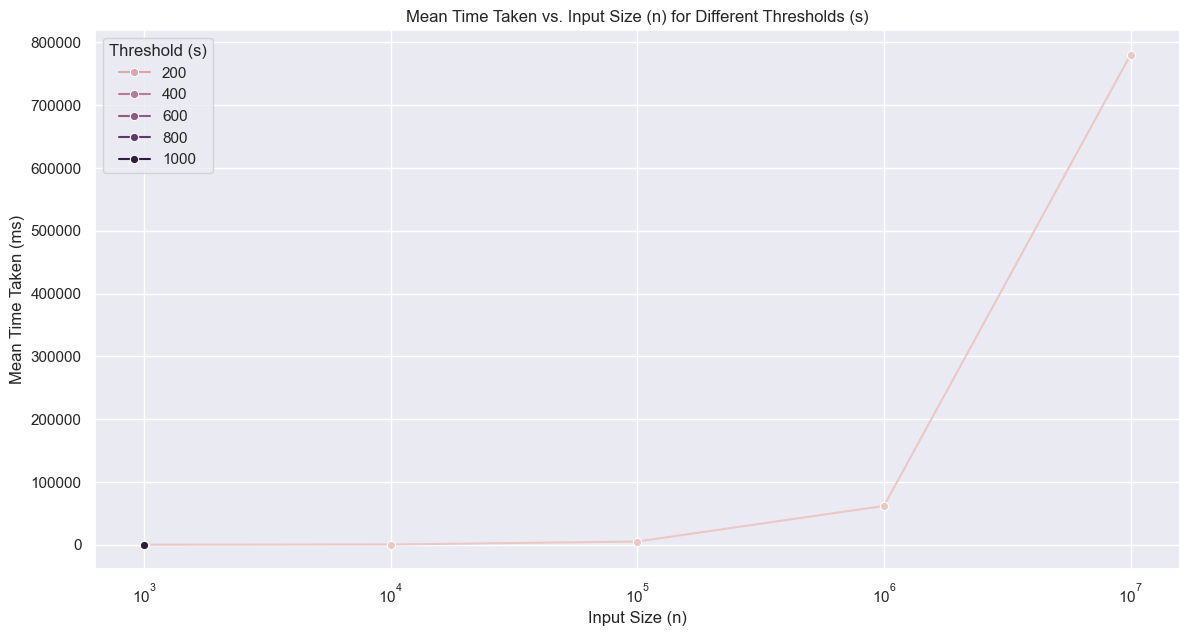

In [4]:
# Plot Mean Time Taken vs. Input Size (n) for different thresholds (s)
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_df, x='Input Size (n)', y='Mean Time Taken (ms)', hue='Threshold (s)', marker='o')
plt.xscale('log')  # Use logarithmic scale for the x-axis to handle large ranges
#plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis if needed
plt.title('Mean Time Taken vs. Input Size (n) for Different Thresholds (s)')
plt.xlabel('Input Size (n)')
plt.ylabel('Mean Time Taken (ms)')
plt.legend(title='Threshold (s)')
plt.show()

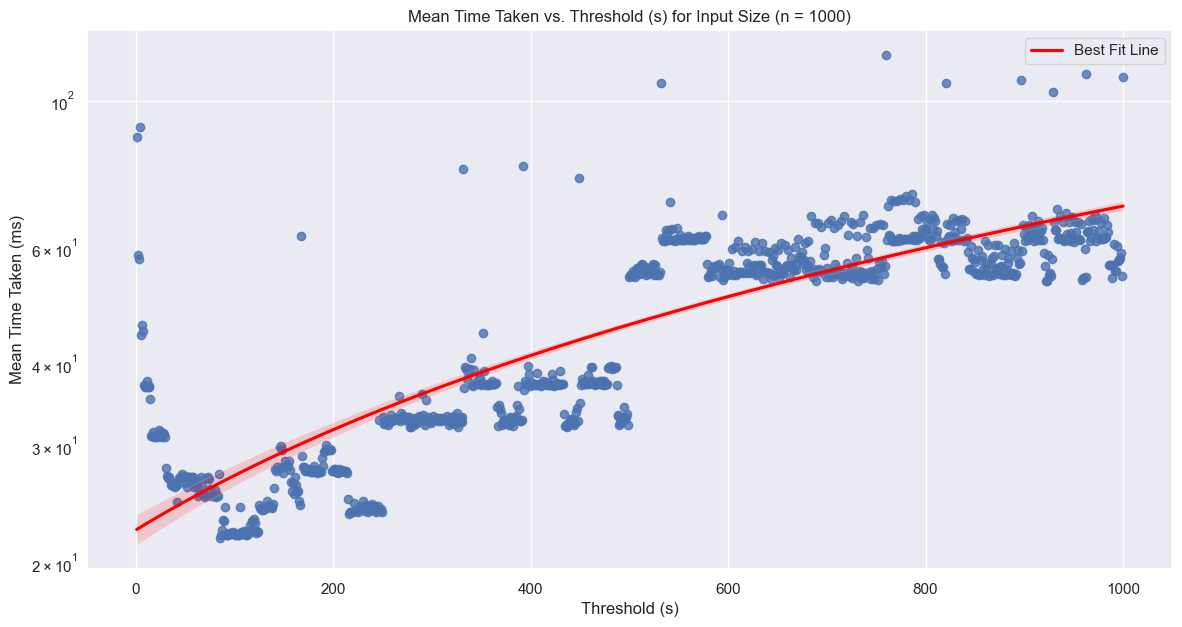

In [5]:
# Filter data for a specific input size (n) to analyze the effect of threshold (s)
specific_n = 1000  # Adjust this value to a representative input size from your data
filtered_df = mean_df[mean_df['Input Size (n)'] == specific_n]

plt.figure(figsize=(14, 7))
sns.regplot(data=filtered_df, x='Threshold (s)', y='Mean Time Taken (ms)', marker='o', 
            line_kws={'color': 'red', 'label': 'Best Fit Line'})
plt.xscale('linear')  # Use linear scale for the x-axis
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis if needed
plt.title(f'Mean Time Taken vs. Threshold (s) for Input Size (n = {specific_n})')
plt.xlabel('Threshold (s)')
plt.ylabel('Mean Time Taken (ms)')
plt.legend()
plt.show()

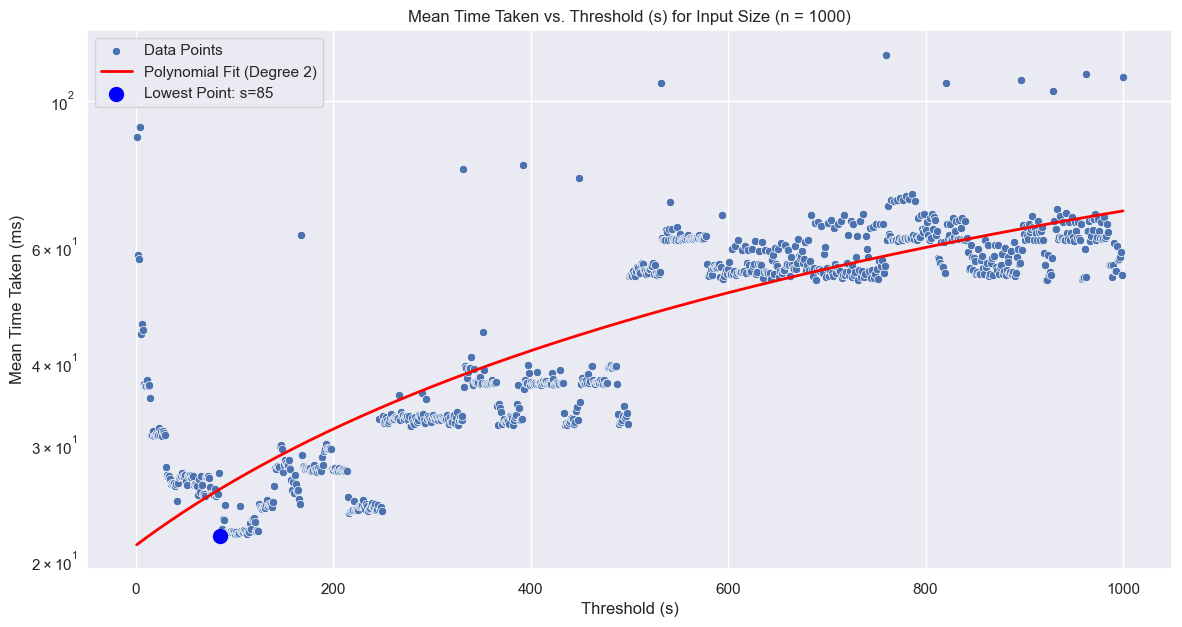

In [9]:
# Find the minimum Mean Time Taken and its corresponding Threshold
min_time_taken = filtered_df['Mean Time Taken (ms)'].min()
min_threshold = filtered_df[filtered_df['Mean Time Taken (ms)'] == min_time_taken]['Threshold (s)'].values[0]

# Fit a polynomial regression (e.g., degree 2 or 3) instead of a linear regression
poly_coeff = np.polyfit(filtered_df['Threshold (s)'], filtered_df['Mean Time Taken (ms)'], deg=2)  # Try degree 2 or 3
poly_func = np.poly1d(poly_coeff)

# Generate a range of x values (thresholds) for plotting the polynomial curve
x_vals = np.linspace(filtered_df['Threshold (s)'].min(), filtered_df['Threshold (s)'].max(), 500)
y_vals = poly_func(x_vals)

# Plot the original data and the polynomial fit curve
plt.figure(figsize=(14, 7))
sns.scatterplot(data=filtered_df, x='Threshold (s)', y='Mean Time Taken (ms)', marker='o', label='Data Points')

# Plot the polynomial fit curve
plt.plot(x_vals, y_vals, color='red', label=f'Polynomial Fit (Degree 2)', linewidth=2)

# Highlight the minimum point
plt.scatter(min_threshold, min_time_taken, color='blue', s=100, zorder=5, label=f'Lowest Point: s={min_threshold}')

# Add plot title and labels
plt.xscale('linear')  # or log scale depending on the data
plt.yscale('log')  # log scale to better show time differences
plt.title(f'Mean Time Taken vs. Threshold (s) for Input Size (n = {specific_n})')
plt.xlabel('Threshold (s)')
plt.ylabel('Mean Time Taken (ms)')
plt.legend()
plt.show()